### EastWestAirlines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
airline = pd.read_csv('EastWestAirlines.csv')

In [3]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline = airline.drop(['ID#'],axis=1)

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
airline.shape

(3999, 11)

In [7]:
airline[airline.duplicated()].shape

(1, 11)

In [8]:
airline = airline.drop_duplicates()

In [9]:
airline.shape

(3998, 11)

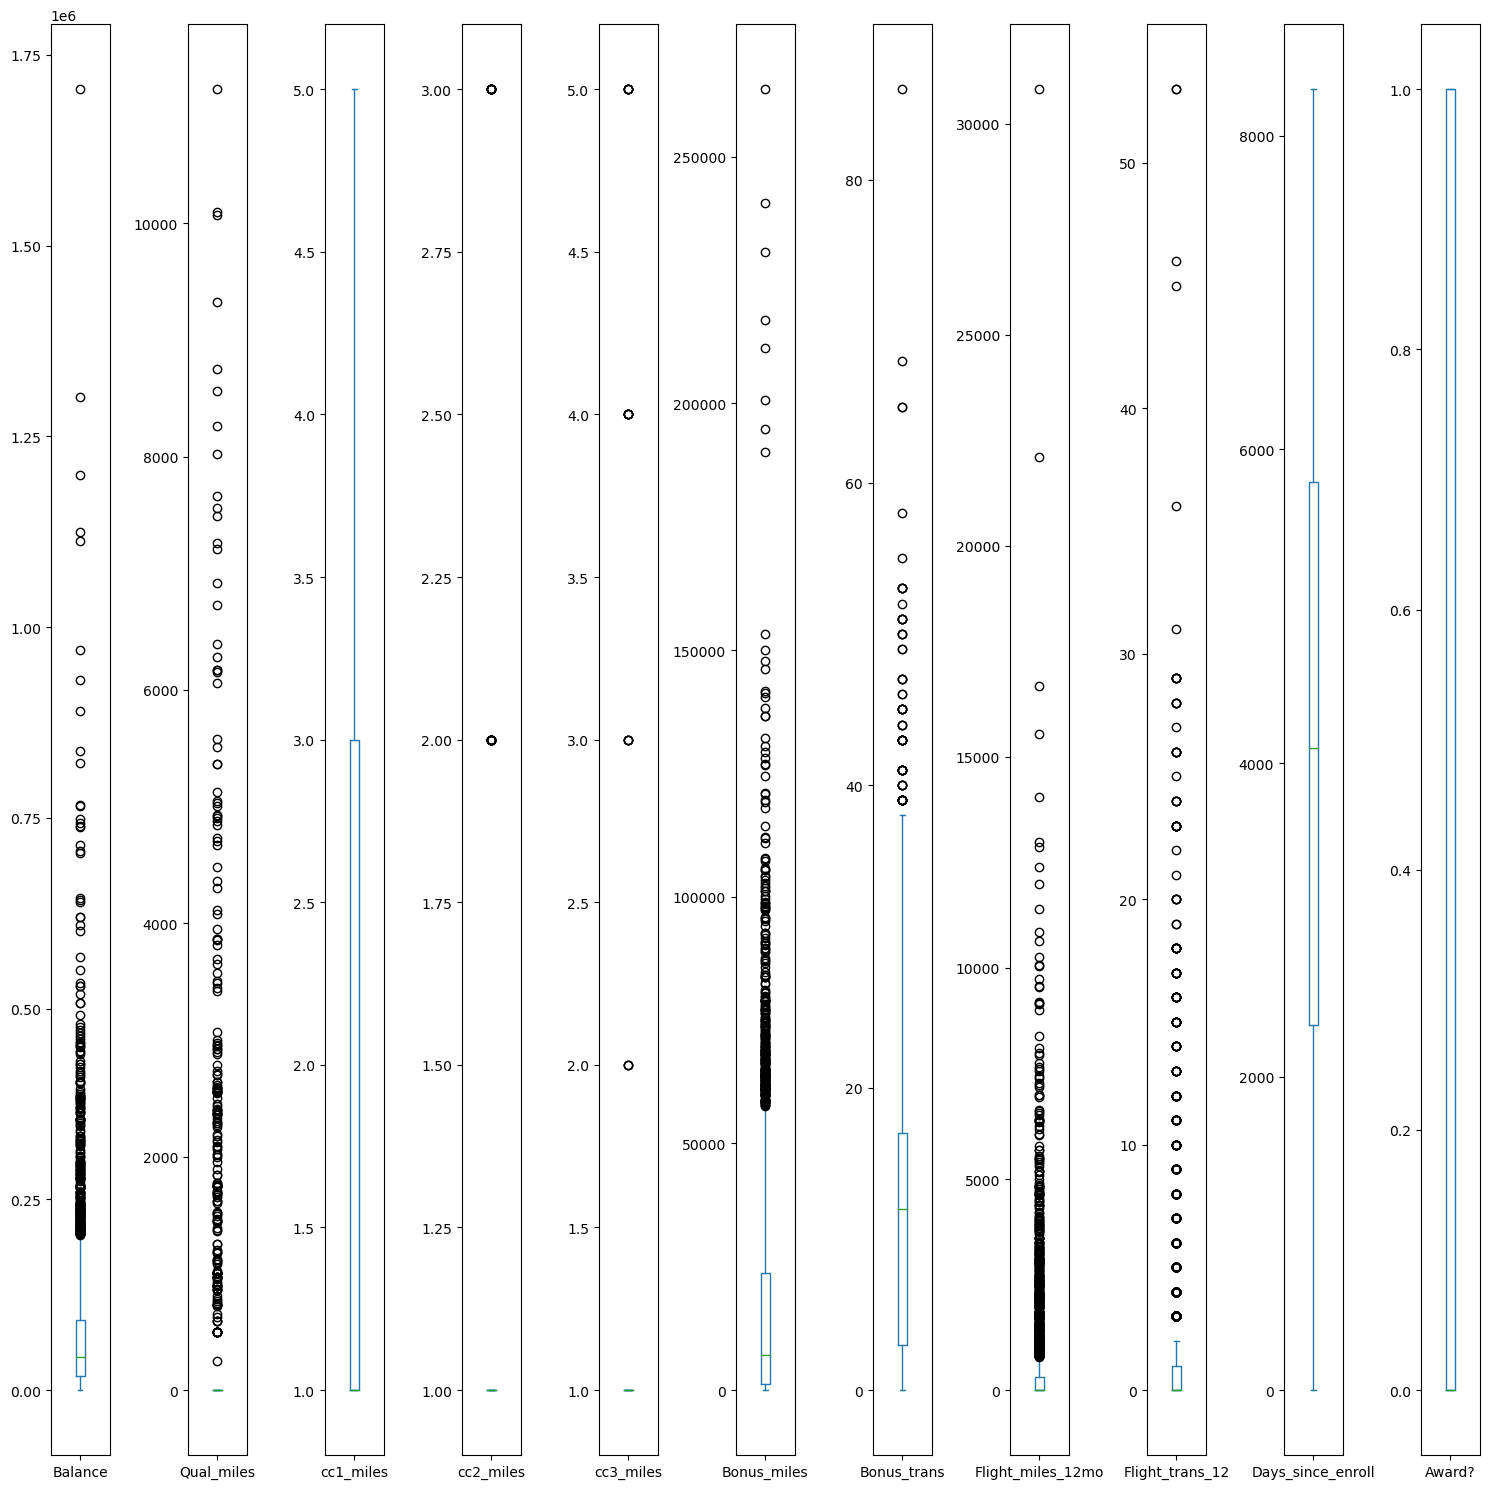

In [10]:
# Ploting the box plots
airline.plot(kind='box', subplots=True, figsize=(15,15))
plt.tight_layout()
plt.show()

### Normalization

In [11]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [12]:
airline_norm = norm_func(airline)
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Hierarchical Cluatering

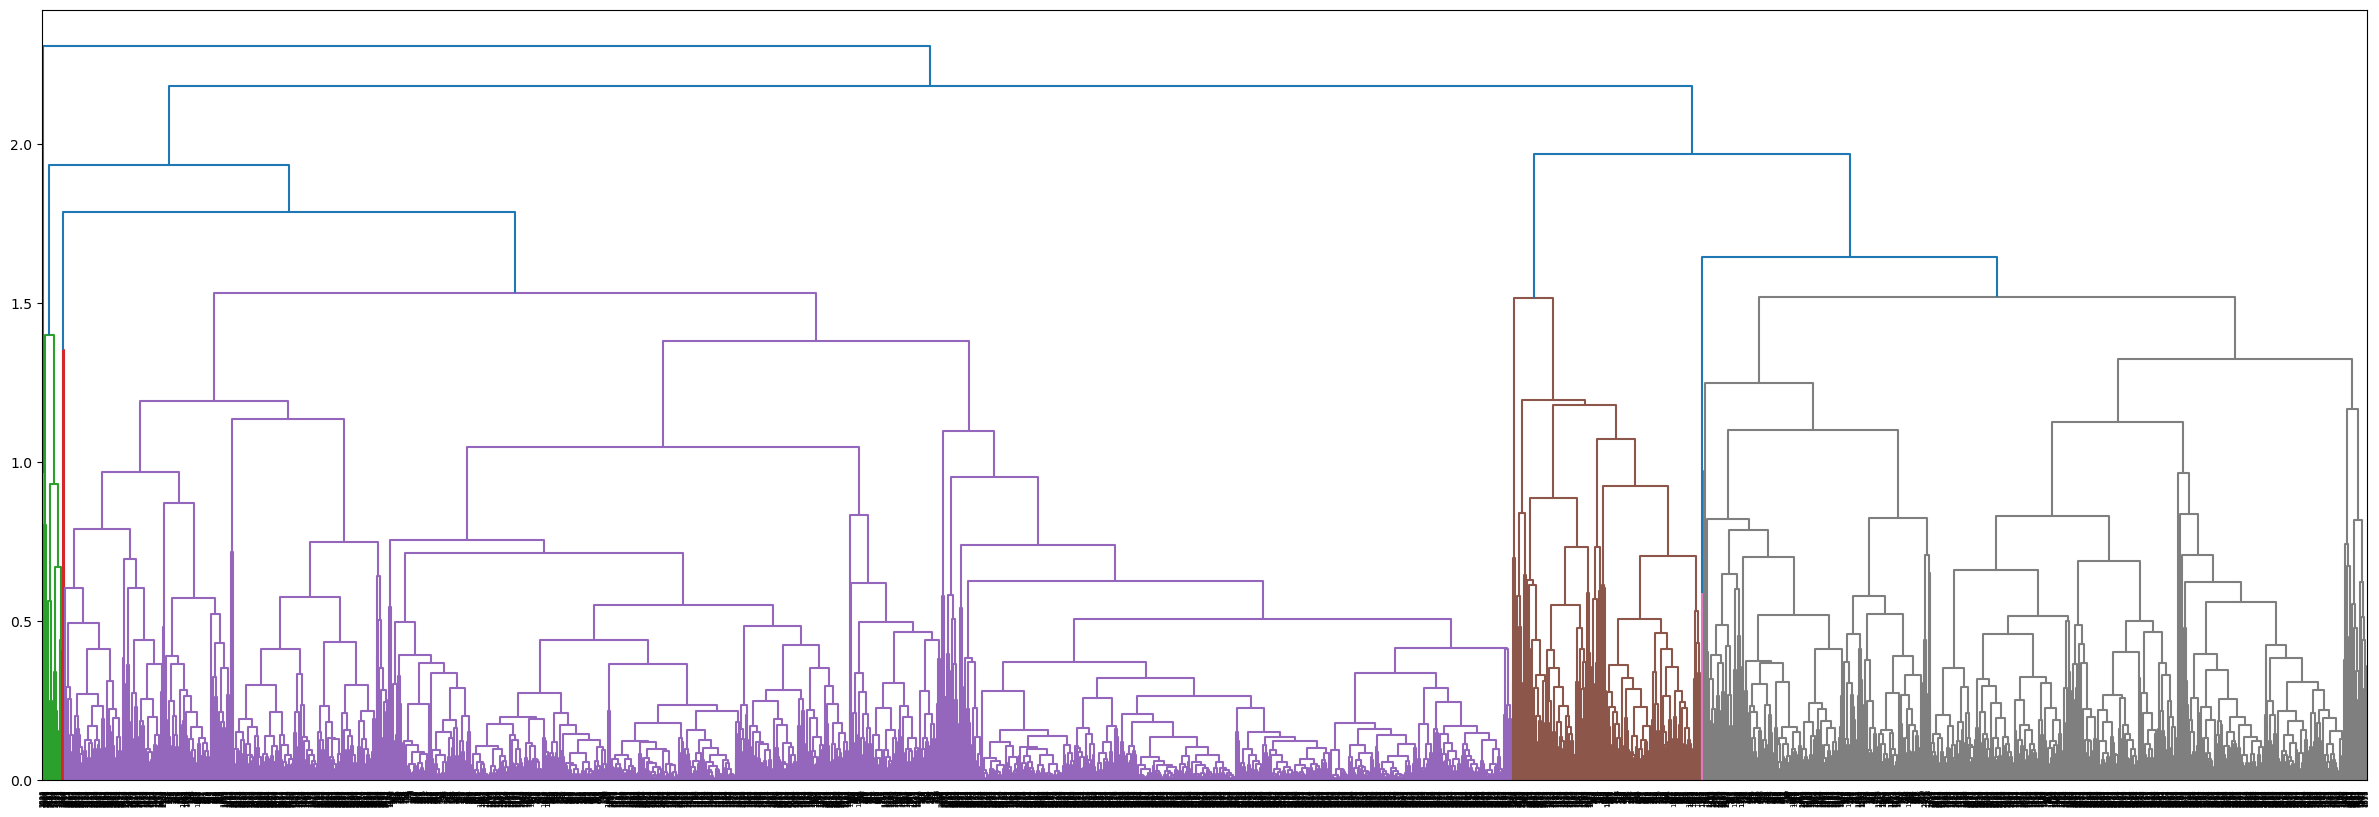

In [13]:
#dendrogram
plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(airline_norm, method='complete'))
plt.show()
# here the method used for calculating the distance is complete,which is the farest neighbour

In [14]:
al_hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')

In [15]:
y_hc = al_hc.fit_predict(airline_norm)

In [16]:
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [17]:
h_al_norm = airline_norm.copy()
h_al = airline.copy()

In [18]:
h_al_norm['h_clusterid'] = y_hc
h_al_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [19]:
h_al_norm['h_clusterid'].value_counts()

0    2525
2    1144
1     325
3       4
Name: h_clusterid, dtype: int64

In [20]:
h_al['h_clusterid'] = al_hc.labels_
h_al

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
h_al_norm.groupby(['h_clusterid']).agg('mean').reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,0.035085,0.007914,0.175941,0.009307,0.002772,0.039172,0.106926,0.007481,0.012688,0.461028,0.003168
1,1,0.092140,0.018719,0.915385,0.000000,0.015385,0.267278,0.270340,0.033080,0.060319,0.695511,1.000000
2,2,0.047027,0.022296,0.276224,0.004808,0.000219,0.064027,0.155960,0.024011,0.042205,0.518734,1.000000
3,3,0.077426,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000


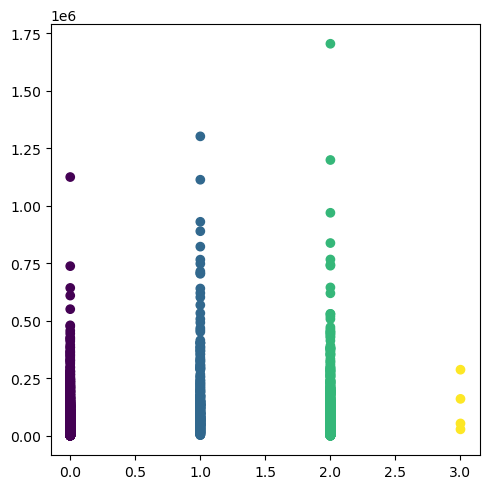

In [23]:
# drawing plot of the clusters
plt.figure(figsize=(5,5))
plt.scatter(h_al['h_clusterid'], h_al['Balance'], c=al_hc.labels_)
plt.tight_layout()
plt.show()

## KMeans

using elbow method to find the optimum no of clusters.
The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

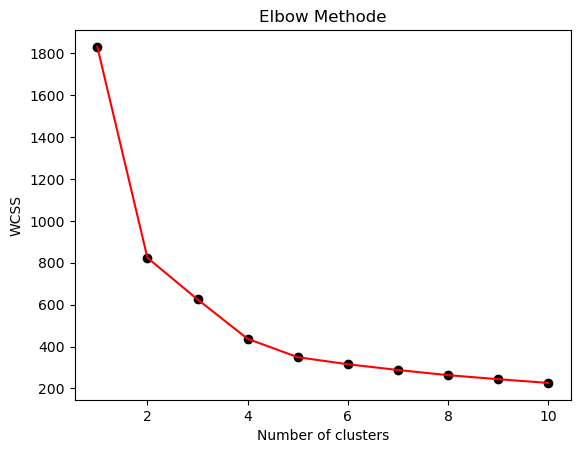

In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airline_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, color='red')
plt.scatter(range(1,11), wcss, color='black')
plt.title('Elbow Methode')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### from the elbow graph, the number of clusters taken as k= 4 or 5

#### Building K-means clustring algorithm for K=4

In [25]:
K4_al_norm = airline_norm.copy()
K4_al = airline.copy()

In [26]:
K4_cluster = KMeans(n_clusters=4, random_state=0)
K4_cluster.fit(K4_al_norm)

KMeans(n_clusters=4, random_state=0)

In [27]:
K4_cluster.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [28]:
K4_al['K4_clusterid'] = K4_cluster.labels_
K4_al

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K4_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [29]:
K4_al.groupby(['K4_clusterid'])['Balance'].apply(lambda x: tuple(x))

K4_clusterid
0    (97752, 443003, 104860, 96522, 28495, 51890, 9...
1    (28143, 19244, 41354, 14776, 16420, 40091, 433...
2    (20856, 13958, 185681, 19221, 23193, 2176, 603...
3    (84914, 177926, 276571, 121260, 75971, 38077, ...
Name: Balance, dtype: object

In [30]:
K4_al['K4_clusterid'].value_counts()

1    1896
0     808
2     673
3     621
Name: K4_clusterid, dtype: int64

In [31]:
K4_cluster.cluster_centers_

array([[6.35352962e-02, 1.77912301e-02, 7.28960396e-01, 6.18811881e-04,
        6.49752475e-03, 1.72970238e-01, 2.34903868e-01, 2.31602349e-02,
        4.04212591e-02, 5.86139300e-01, 1.00000000e+00],
       [2.39134635e-02, 8.28799020e-03, 2.32067511e-02, 8.96624473e-03,
        1.05485232e-03, 1.26549175e-02, 7.54894024e-02, 7.35695912e-03,
        1.24392962e-02, 4.36240447e-01, 2.22044605e-15],
       [4.89953609e-02, 2.60542873e-02, 3.90044577e-02, 1.63447251e-02,
        2.22882615e-03, 3.35642727e-02, 1.21825219e-01, 3.34267751e-02,
        5.94073285e-02, 5.22892182e-01, 1.00000000e+00],
       [6.92335936e-02, 6.55837114e-03, 6.44122383e-01, 8.05152979e-04,
        5.63607085e-03, 1.18636504e-01, 2.00595439e-01, 7.31260853e-03,
        1.19405706e-02, 5.34640411e-01, 5.55111512e-17]])

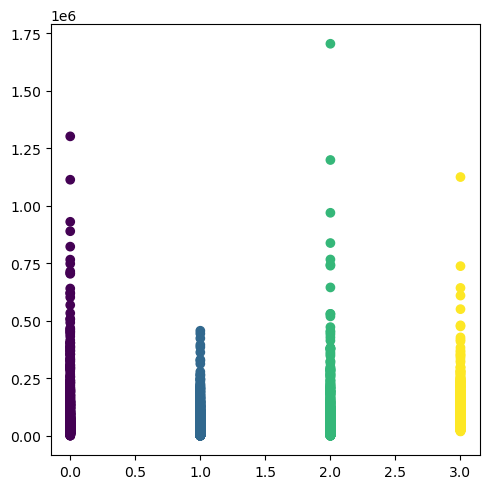

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(K4_al['K4_clusterid'], K4_al['Balance'], c = K4_cluster.labels_)
plt.tight_layout()
plt.show()

In [33]:
# Group data by clusters (K=4)
K4_al.groupby('K4_clusterid').agg('mean').reset_index()

,K4_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
1,1,40768.581224,92.394515,1.092827,1.017932,1.004219,3336.911920,6.492089,226.719409,0.659283,3620.178270,0.0
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0


### Building K-means clustring algorithm for K=5

In [34]:
K5_al = airline.copy()
K5_al_norm = airline_norm.copy()

In [35]:
K5_cluster = KMeans(n_clusters=5, random_state=0)
K5_cluster.fit(K5_al_norm)

KMeans(n_clusters=5, random_state=0)

In [36]:
K5_cluster.labels_

array([1, 1, 1, ..., 0, 2, 2])

In [37]:
K5_al['K5_clusterid'] = K5_cluster.labels_

In [38]:
K5_al

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K5_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [39]:
K5_cluster.cluster_centers_

array([[6.35352962e-02, 1.77912301e-02, 7.28960396e-01, 6.18811881e-04,
        6.49752475e-03, 1.72970238e-01, 2.34903868e-01, 2.31602349e-02,
        4.04212591e-02, 5.86139300e-01, 1.00000000e+00],
       [2.92823328e-02, 8.06451613e-03, 3.05299539e-02, 9.79262673e-03,
        2.88018433e-04, 1.31485480e-02, 8.03906334e-02, 7.91232441e-03,
        1.37379358e-02, 6.71078504e-01, 1.77635684e-15],
       [1.94320126e-02, 8.45201690e-03, 1.77012609e-02, 8.24442289e-03,
        1.69738118e-03, 1.23164659e-02, 7.18539237e-02, 6.91362644e-03,
        1.14012774e-02, 2.40027206e-01, 2.22044605e-15],
       [6.93891884e-02, 6.59020789e-03, 6.46035599e-01, 8.09061489e-04,
        5.66343042e-03, 1.19022293e-01, 2.00383834e-01, 7.27197078e-03,
        1.18458814e-02, 5.32620376e-01, 0.00000000e+00],
       [4.89953609e-02, 2.60542873e-02, 3.90044577e-02, 1.63447251e-02,
        2.22882615e-03, 3.35642727e-02, 1.21825219e-01, 3.34267751e-02,
        5.94073285e-02, 5.22892182e-01, 1.00000000e+

In [40]:
K5_al.groupby(['K5_clusterid']).agg('mean').reset_index()

,K5_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
1,1,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
2,2,33128.433560,94.223084,1.070805,1.016489,1.006790,3247.667313,6.179437,213.057226,0.604268,1992.785645,0.0
3,3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
4,4,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0


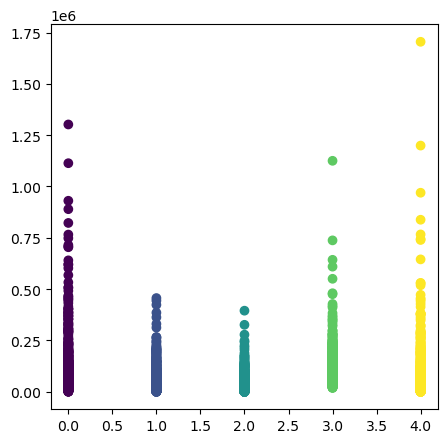

In [41]:
# Plot Clusters
plt.figure(figsize=(5,5))
plt.scatter(K5_al['K5_clusterid'], K5_al['Balance'], c=K5_cluster.labels_)
plt.show()

## DBSCAN

In [43]:
ds_al = airline.copy()
ds_al_norm = airline_norm.copy()

In [44]:
# DBSCAN Clustering
ds_cluster = DBSCAN(eps=0.6, min_samples=5)
ds_cluster.fit(db_al_norm)

DBSCAN(eps=0.6)

In [45]:
# Noisy samples are given the label -1
ds_cluster.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
ds_al['db_clusterid'] = ds_cluster.labels_
ds_al

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [50]:
ds_al.groupby(['db_clusterid']).agg('mean').reset_index()

,db_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1,84273.000000,166.666667,1.000000,1.000000,2.333333,118908.000000,32.666667,10479.666667,18.666667,1460.666667,0.666667
1,0,59821.538951,87.672099,1.705882,1.013911,1.007154,10202.374006,9.147456,226.472178,0.653021,3822.635533,0.000000
2,1,97070.248817,240.183232,2.663962,1.015551,1.018256,28760.204868,15.742394,837.403651,2.565247,4629.066261,1.000000


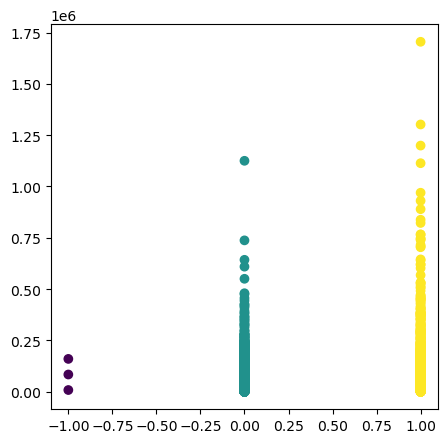

In [52]:
# ploting the clusters
plt.figure(figsize=(5,5))
plt.scatter(ds_al['db_clusterid'], ds_al['Balance'], c=ds_cluster.labels_)
plt.show()